In [5]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.cross_validation import train_test_split
from statsmodels.discrete.discrete_model import Logit
from pandas.tools.plotting import scatter_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, roc_auc_score
import pandas as pd
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
X = pd.read_csv('X_batting.csv')

In [7]:
X = X.drop('Unnamed: 0', axis=1)

# Using a different approach this time. Rather than extracting the highest level of each year (e.g. only using stats from AAA if a player played in AA and AAA in one year), I am trying to AVERAGE one year's stats

In [8]:
X.insert(0, 'Number_row', 1)   # for number of rows (or levels) for each year

In [9]:
X.columns

Index([u'Number_row', u'AB', u'Aff_batting', u'AgeDif_batting', u'Age_batting',
       u'BA', u'Bats_Right', u'Bats_left', u'CS_perc_fielding', u'Catcher',
       u'Centerfielder', u'Ch', u'Drafted', u'First', u'Fld_perc', u'GDP',
       u'G_batting', u'HR_batting', u'Height', u'Leftfielder', u'Lev',
       u'Lg_batting', u'Name', u'OBP', u'OPS', u'Outfielder', u'PA', u'RBI',
       u'RF/G', u'R_batting', u'Rightfielder', u'Rookie?', u'SB_batting',
       u'SLG', u'SO_batting', u'Second', u'Shortstop', u'TB', u'Third', u'Tm',
       u'Weight', u'Year', u'player_id', u'CS_perc_batting'],
      dtype='object')

'AB', 'Age_batting', 'Bats_Right', 'Bats_left', 'Catcher', 'Centerfielder', 'Ch', 'Drafted', 'First', 'GDP', 'G_batting',
 'Height', 'Leftfielder', 'Outfielder', 'RBI', 'R_batting', 'Rightfielder', 'Rookie?', 'SB_batting', 'SO_batting'
'Second', 'Shortstop', 'TB', 'Third', 'Weight', 'Year', 'player_id'
- For simple avearge (number_row)

In [10]:
X[['CS_perc_fielding', 'Fld_perc', 'RF/G']] = \
    X[['CS_perc_fielding', 'Fld_perc', 'RF/G']].apply(lambda x: x * X.G_batting)  # weighted average (game)

In [11]:
X[['BA', 'HR_batting', 'OBP', 'SLG', 'OPS', 'CS_perc_batting']] =\
    X[['BA', 'HR_batting', 'OBP', 'SLG', 'OPS', 'CS_perc_batting']].apply(lambda x: x * X.AB) 
    # weighted average (IP)

In [73]:
#X = X.drop(['BB9', 'GS', 'H9', 'RAvg'], axis=1) # drop

In [74]:
X_group = X.groupby(['player_id', 'Year']).sum()  #grouping by player_id and year

In [75]:
X_group.Lev = X_group.Lev / X_group.Number_row + X_group.Number_row  #

### Columns that can be simply averaged over number of rows

In [76]:
X_group[['AB', 'Age_batting', 'AgeDif_batting', 'Bats_Right', 'Bats_left',
         'Catcher', 'Centerfielder', 'Ch', 'Drafted', 'First', 'GDP', 'G_batting',
         'Height', 'Leftfielder', 'Outfielder', 'RBI', 'R_batting', 'Rightfielder', 
         'Rookie?', 'SB_batting', 'SO_batting','Second', 'Shortstop', 'TB', 'Third', 'Weight']] =\
X_group[['AB', 'Age_batting', 'AgeDif_batting', 'Bats_Right', 'Bats_left', 'Catcher', 
         'Centerfielder', 'Ch', 'Drafted', 'First', 'GDP', 'G_batting', 'Height',
         'Leftfielder', 'Outfielder', 'RBI', 'R_batting', 'Rightfielder', 'Rookie?',
         'SB_batting', 'SO_batting', 'Second', 'Shortstop', 'TB', 'Third', 'Weight'
        ]].apply(lambda x: x / X_group.Number_row)

### Columns that needs to be averaged over number of games played

In [77]:
X_group[['CS_perc_fielding', 'Fld_perc', 'RF/G']] =\
    X_group[['CS_perc_fielding', 'Fld_perc', 'RF/G']].apply(lambda x: x / X_group.G_batting)

### Columns that need to be averaged over number of At-bats

In [78]:
X_group[['BA', 'HR_batting', 'OBP', 'SLG', 'OPS', 'CS_perc_batting']] =\
    X_group[['BA', 'HR_batting', 'OBP', 'SLG', 'OPS', 'CS_perc_batting']].apply(lambda x: x / X_group.AB)

In [53]:
X_group_copy = X_group.copy()  # Saving a copy

In [54]:
X_group_copy = X_group_copy.drop('Number_row', axis=1)

In [55]:
X_group_copy.to_csv('X_group_bat.csv')

/home/jun/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app


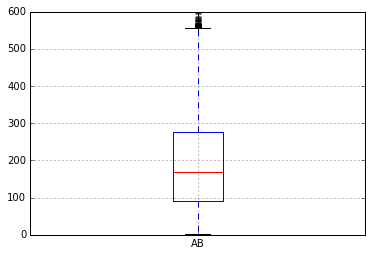

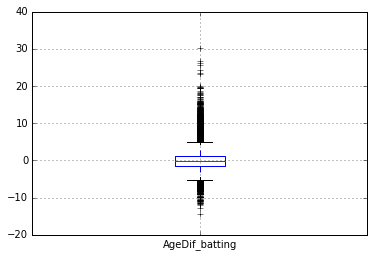

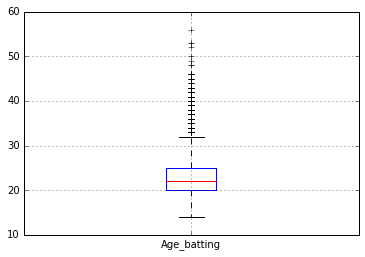

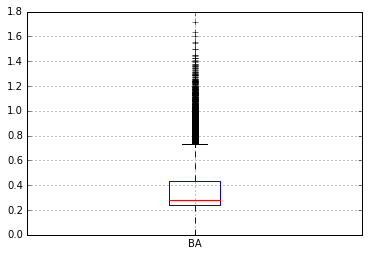

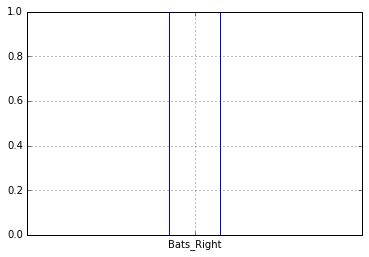

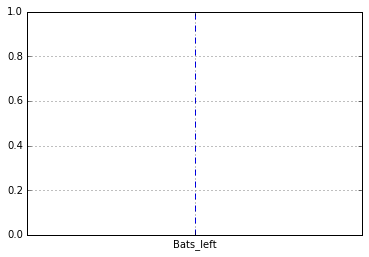

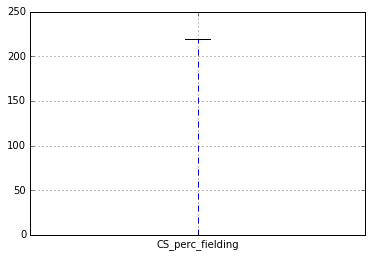

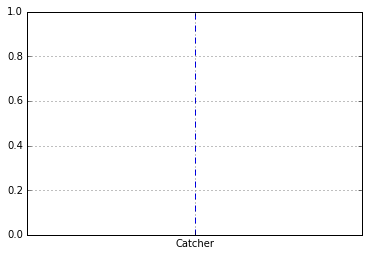

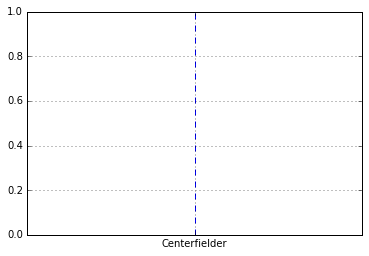

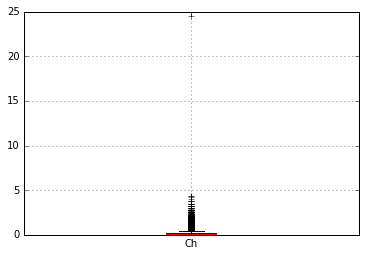

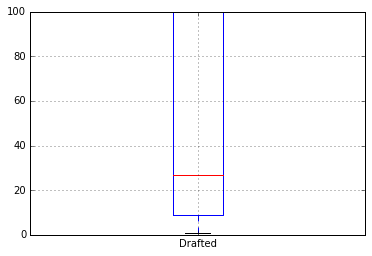

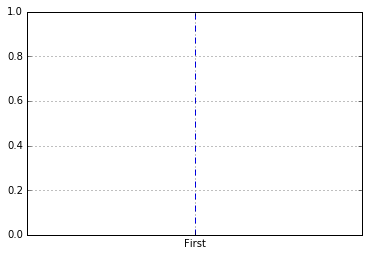

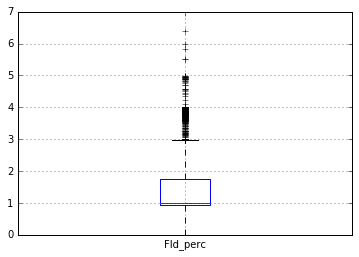

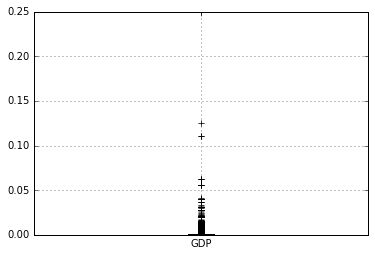

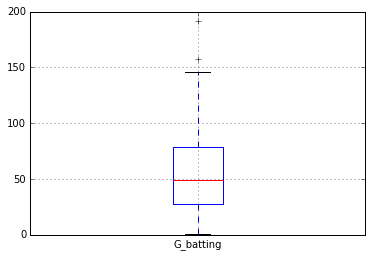

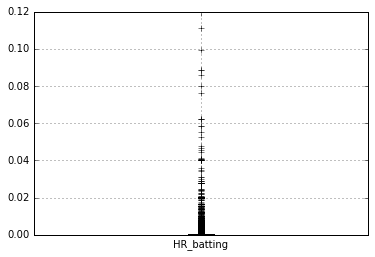

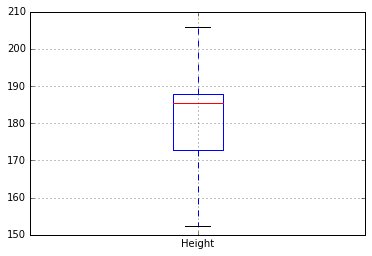

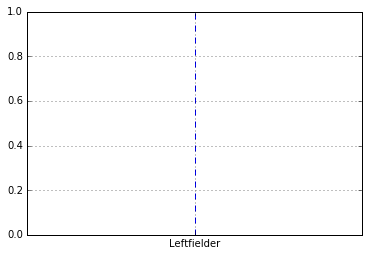

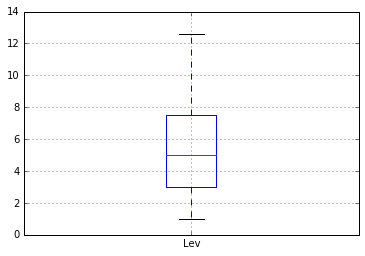

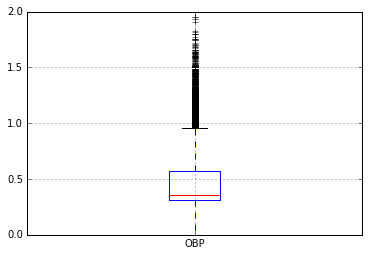

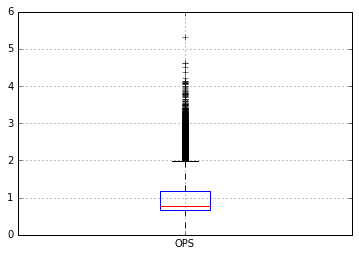

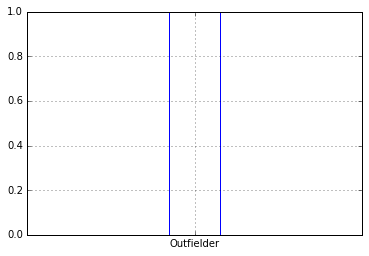

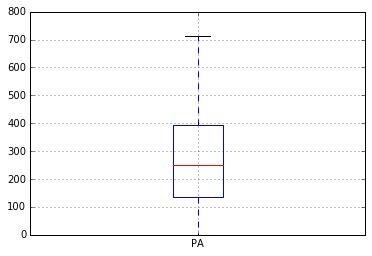

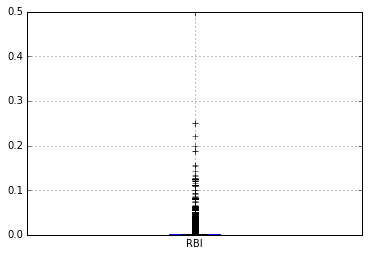

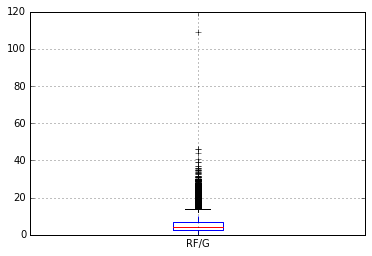

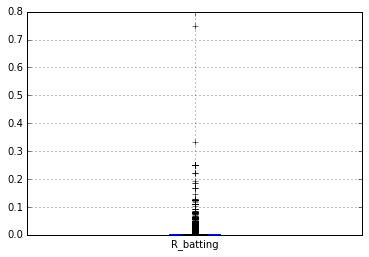

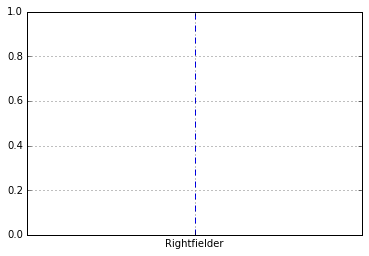

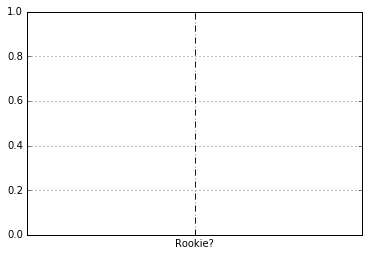

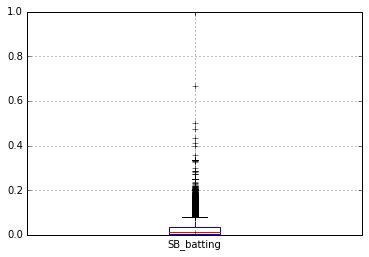

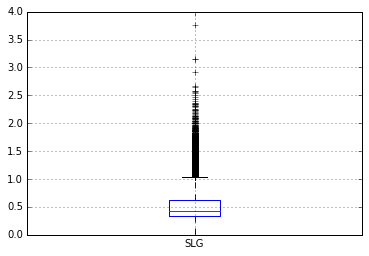

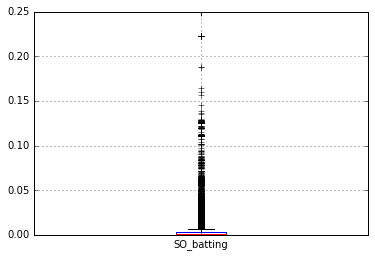

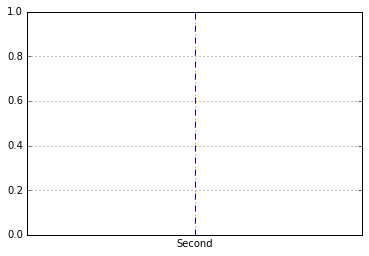

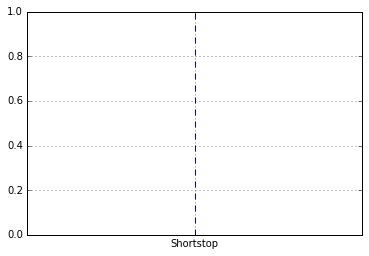

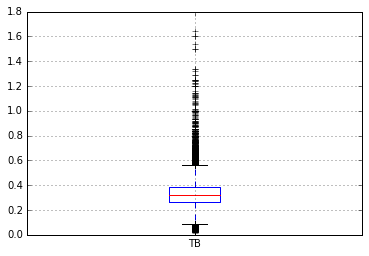

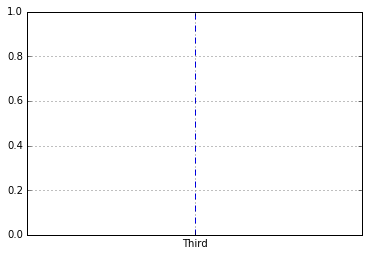

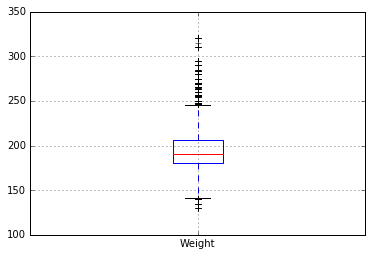

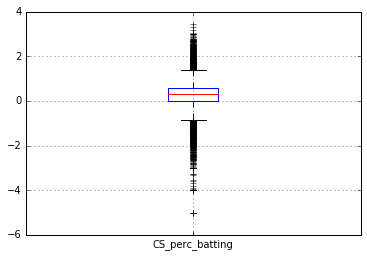

In [83]:
for column in batting.columns:
    batting.boxplot(column)
    plt.show()